# Naive Bayes Classifier Building in Scikit-learn

Defining Dataset

Dalam contoh ini, kita dapat menggunakan kumpulan data dummy dengan tiga kolom: weather, temperature, dan play. Dua yang pertama adalah features(weather, temperature) dan yang lainnya adalah label.

In [2]:
# Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast',
         'Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Encoding Features

Pertama, kita perlu mengubah string menjadi angka, misalnya: 'Overcast', 'Rainy', 'Sunny' sebagai 0, 1, 2. Ini dikenal sebagai label encoding. Scikit-learn menyediakan pustaka LabelEncoder untuk mengenkode label dengan nilai.

In [4]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print("Weather :", weather_encoded)#, sep='\n')

weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping, '\n')

Weather : [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2} 



In [10]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temperature :",temp_encoded)#, sep='\n')

temp_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(temp_mapping, '\n')

print("Play (the label):", label)#, sep='\n')

play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping, '\n')

Temperature : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'No': 0, 'Yes': 1} 

Play (the label): [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'No': 0, 'Yes': 1} 



In [11]:
#Combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [12]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


# Naive Bayes with Multiple Labels

Sampai saat ini kita  telah mempelajari klasifikasi Naive Bayes dengan label biner. Sekarang kita akan belajar tentang multiple class classification di Naive Bayes. Yang dikenal sebagai multinomial Naive Bayes classification. Misalnya, jika kita ingin mengklasifikasikan artikel berita tentang teknologi, hiburan, politik, atau olahraga.

Pada bagian pembuatan model, kita dapat menggunakan dataset wine yang merupakan multi-class classification yang sangat terkenal. Kumpulan data ini adalah hasil dari analisis kimiawi anggur yang ditanam di wilayah yang sama di Italia tetapi berasal dari tiga kultivar berbeda.

Set data terdiri dari 13 fitur (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) dan type of wine cultivar. Data ini memiliki tiga jenis anggur Class_0, Class_1, dan Class_3. Di sini kita  dapat membuat model untuk mengklasifikasikan jenis anggur.

Dataset tersedia di pustaka scikit-learn.

Loading Data

Let's first load the required wine dataset from scikit-learn datasets.

In [13]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [14]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [15]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [16]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [17]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 


In [20]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# Decision Tree Classifier

Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau attribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome. Node paling atas dalam pohon keputusan dikenal sebagai root node. Root node belajar untuk mempartisi berdasarkan nilai atribut. Root node mempartisi pohon secara rekursif memanggil partisi rekursif. Flowchart-like structure ini membantu kita dalam pengambilan keputusan. Visualisasinya seperti diagram flowchart yang dengan mudah meniru pemikiran tingkat manusia. Itulah mengapa decision trees mudah dipahami dan diinterpretasikan.

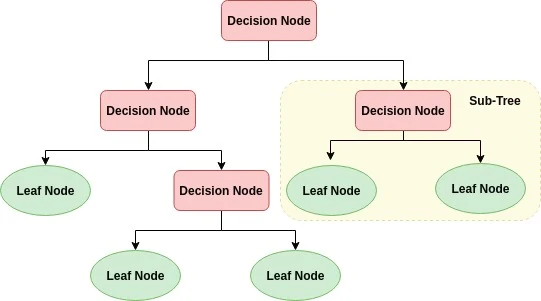

How does the Decision Tree algorithm work?

Ide dasar di balik decision tree algorithm adalah sebagai berikut:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:

- All the tuples belong to the same attribute value.
- There are no more remaining attributes.
- There are no more instances.


# Decision Tree Classifier Building in Scikit-learn

In [22]:
# Load libraries
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [23]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", 
                   header=None, names=col_names)

In [24]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


Feature Selection

Di sini, kita perlu membagi kolom yang diberikan menjadi dua jenis variabel dependen (atau variabel target) dan variabel independen (atau variabel fitur).

In [25]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [26]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']

for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [27]:
pima.dropna(inplace=True)

In [28]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


# Visualizing Decision Trees

Kita bisa menggunakan fungsi export_graphviz Scikit-learn untuk menampilkan tree dalam notebook Jupyter. Untuk plotting tree, kita juga perlu menginstal graphviz dan pydotplus.

pip install graphviz

pip install pydotplus

Fungsi export_graphviz mengubah decision tree classifier menjadi dot file dan pydotplus mengonversi file dot ini ke png atau bentuk yang dapat ditampilkan di Jupyter.

In [32]:
!conda install python-graphviz -y

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2023.7.22          |  py311haa95532_0         155 KB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    lib

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.c

In [33]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/2

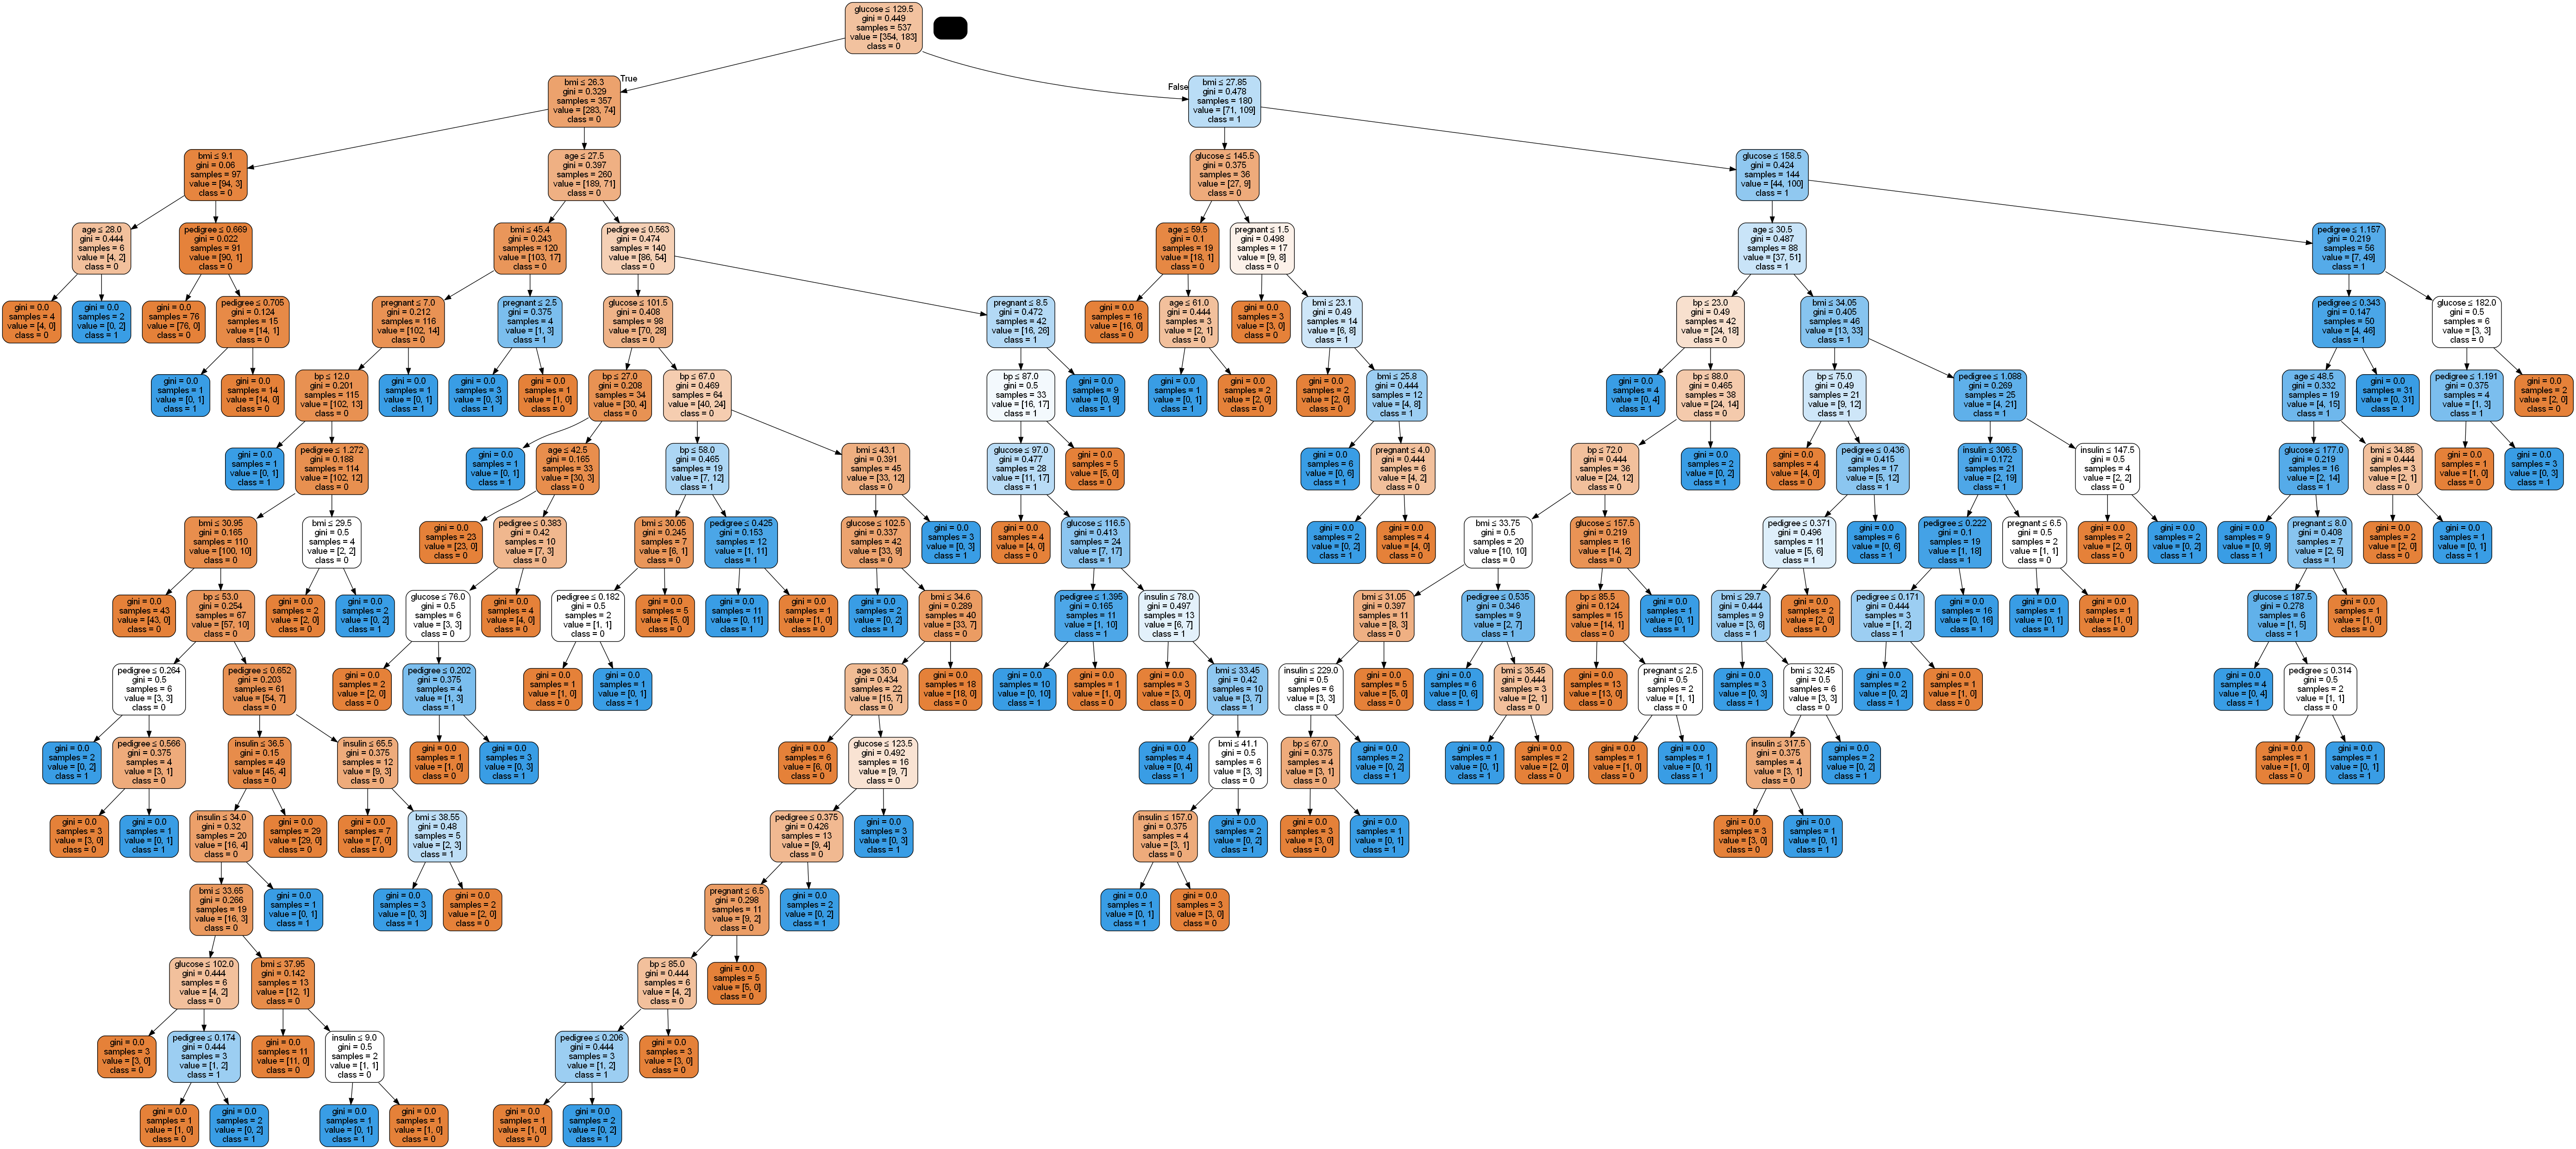

In [36]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image


dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Optimizing Decision Tree Performance

- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

Dalam Scikit-learn, pengoptimalan decision tree classifier dilakukan hanya dengan pre-pruning. Maximum depth pohon dapat digunakan sebagai variabel kontrol untuk pre-pruning. Dalam contoh berikut, kita dapat memplot decision tree pada data yang sama dengan max_depth = 3. Selain parameter pre-pruning, kita  juga dapat mencoba ukuran pemilihan atribut lain seperti entropy.

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


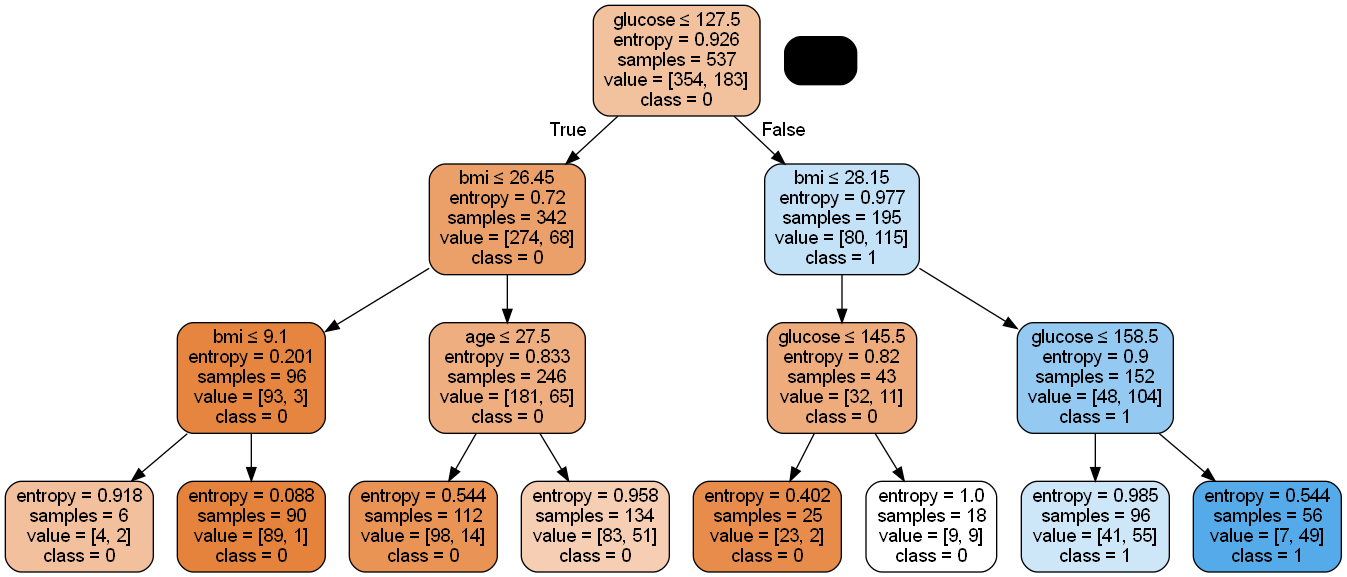

In [38]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

Random Forest secara teknis adalah ensemble method (berdasarkan pendekatan divide-and-conquer) dari decision trees yang dihasilkan pada dataset yang dipisahkan secara acak. Kumpulan decision tree classifiers ini juga dikenal sebagai forest. Decision trees individu dihasilkan menggunakan indikator pemilihan atribut seperti information gain, gain ratio, dan Gini index untuk setiap atribut. Setiap pohon bergantung pada sampel acak yang independen. Dalam masalah klasifikasi, setiap pohon memilih dan kelas paling populer dipilih sebagai hasil akhir. Dalam kasus regresi, rata-rata dari semua keluaran pohon dianggap sebagai hasil akhir. Ini lebih sederhana dan lebih kuat dibandingkan dengan algoritma klasifikasi non-linier lainnya.

# How does the algorithm work?

Random forest bekerja dalam 4 tahap:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

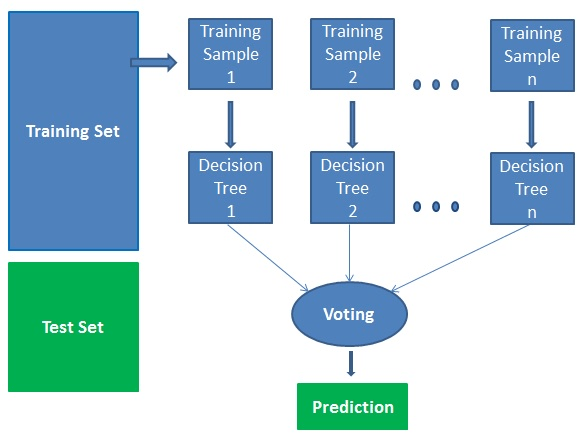

# Finding important features

Random forests juga menawarkan indikator feature selection yang baik. Scikit-learn menyediakan variabel tambahan dengan model tersebut, yang menunjukkan importance relatif atau kontribusi setiap fitur dalam prediksi. Secara otomatis menghitung skor relevansi setiap fitur dalam fase training . Kemudian menurunkan relevansi sehingga jumlah semua skor adalah 1.

Skor ini akan membantu kita memilih fitur yang paling penting dan menghapus fitur yang paling tidak penting untuk pembuatan model.

Random forests menggunakan gini importance atau mean decrease in impurity (MDI) untuk menghitung tingkat importance setiap fitur. Gini importance juga dikenal sebagai total decrease dalam node impurity. Ini adalah seberapa besar kecocokan atau akurasi model menurun saat kita menghapus variabel. Semakin besar penurunannya, semakin signifikan variabel tersebut. Di sini, mean decrease adalah parameter signifikan untuk pemilihan variabel. Gini index dapat menggambarkan kekuatan penjelas variabel secara keseluruhan.

# Random Forests vs Decision Trees

- Random forests adalah kumpulan dari beberapa decision trees.
- Deep decision trees mungkin mengalami overfitting, tetapi random forests mencegah overfitting dengan membuat trees pada random subsets.
- Decision trees secara komputasi lebih cepat.
- Random forests sulit untuk diinterpretasikan, sedangkan decision tree mudah diinterpretasikan dan dapat diubah menjadi rules.

# Building a Classifier using Scikit-learn

Kita akan membuat model pada kumpulan data iris flower, yang merupakan kumpulan klasifikasi yang sangat terkenal. Terdiri dari sepal length, sepal width, petal length, petal width, dan jenis bunga. Ada tiga spesies atau kelas: setosa, versicolor, dan virginia. Kita akan membangun model untuk mengklasifikasikan jenis bunga. Dataset tersedia di pustaka scikit-learn atau kita dapat mengunduhnya dari Repositori Machine Learning UCI.

Mulailah dengan mengimpor pustaka kumpulan data dari scikit-learn, dan muat kumpulan data iris dengan load_iris().

In [39]:
#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
iris = datasets.load_iris()

Kita dapat mencetak target dan feature , untuk memastikan kita memiliki dataset yang tepat, seperti:

In [40]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names) 

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Ada baiknya untuk selalu menjelajahi data kita sedikit, sehingga kita tahu apa yang sedang kita kerjakan. Di sini, kita dapat melihat lima baris pertama kumpulan data dicetak, serta variabel target untuk seluruh kumpulan data.

In [41]:
# print the iris data (top 5 records)
print(iris.data[0:5]) 

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Di sini, kita dapat membuat DataFrame dari dataset iris dengan cara berikut.

In [42]:
# Creating a DataFrame of given iris dataset.
import pandas as pd

data=pd.DataFrame({    
    'sepal length':iris.data[:,0],    
    'sepal width':iris.data[:,1],    
    'petal length':iris.data[:,2],    
    'petal width':iris.data[:,3],    
    'species':iris.target 
}) 

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pertama, kita pisahkan kolom menjadi variabel dependen dan independen (atau features dan labels). Kemudian kita membagi variabel tersebut menjadi training dan test set.

In [43]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Setelah dipisahkan, kita akan melatih model pada set training dan melakukan prediksi pada set test.

In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

Setelah training, periksa accuracy menggunakan nilai actual dan predicted.

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


Kita juga dapat membuat prediksi untuk satu item, misalnya:

- sepal length = 3
- sepal width = 5
- petal length = 4
- petal width = 2

Sekarang kita  bisa memprediksi jenis bunganya.

In [47]:
clf.predict([[3, 5, 4, 2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

Di sini, 2 menunjukkan jenis bunga Virginica.

# Finding Important Features in Scikit-learn

Di sini, kita dapat menemukan fitur penting atau memilih fitur dalam dataset IRIS. Dalam scikit-learn, kita dapat melakukan tugas ini dalam langkah-langkah berikut:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [48]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False) 

feature_imp

petal width (cm)     0.522347
petal length (cm)    0.339676
sepal length (cm)    0.118420
sepal width (cm)     0.019556
dtype: float64

Kita juga dapat memvisualisasikan feature importance. Visualisasi mudah dipahami dan diinterpretasikan.

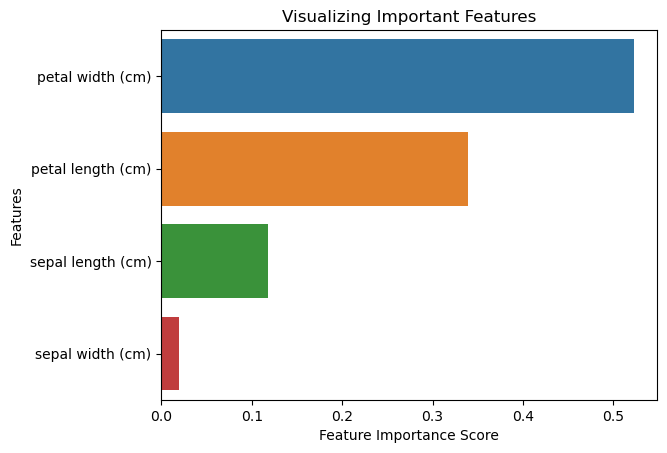

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Generating the Model on Selected Features

Di sini, kita dapat menghapus fitur "sepal width" karena tingkat kepentingannya sangat rendah, dan memilih 3 fitur lainnya.

In [55]:
# split into train and test set
from sklearn.model_selection import train_test_split

# Features
X = data[['sepal length', 'petal length', 'petal width']]
# Target
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .7, # train 30%, test 70%
    random_state = 5
)

Setelah dipisah, kita akan membuat model pada training set features yang dipilih, melakukan prediksi pada test set features yang dipilih, dan membandingkan nilai aktual dan nilai prediksi.

In [54]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

# prediction on test set
y_pred=clf.predict(X_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


Kita dapat melihat bahwa setelah menghapus fitur yang paling tidak penting (sepal length), keakuratannya meningkat. Ini karena kita  menghapus data dan noise yang menyesatkan, sehingga meningkatkan akurasi. Jumlah fitur yang lebih sedikit juga mengurangi training time.

# SVM

Secara umum, Support Vector Machines dianggap sebagai classification approach, tetapi dapat digunakan di kedua jenis masalah klasifikasi dan regresi. SVM dapat dengan mudah menangani beberapa variabel kontinu dan kategorikal. SVM membangun hyperplane  dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan hyperplane optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan maximum marginal hyperplane(MMH) yang paling baik membagi dataset menjadi beberapa kelas.

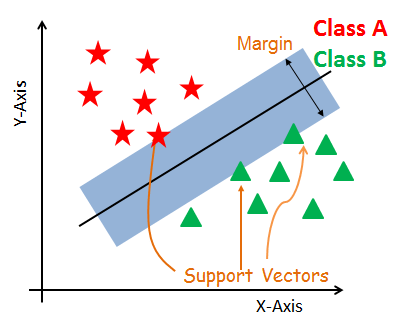

# Support Vectors

Support vectors adalah data points, yang paling dekat dengan hyperplane. Titik-titik ini akan menentukan garis pemisah dengan lebih baik dengan menghitung margin.

# Hyperplane

Hyperplane adalah decision plane yang memisahkan antara sekumpulan objek yang memiliki kelas yang berbeda.

# Margin

Margin adalah celah antara dua garis pada poin kelas terdekat. Margin dihitung sebagai jarak tegak lurus dari garis untuk mendukung vektor atau titik terdekat. Jika margin lebih besar di antara kelas, maka itu dianggap sebagai margin yang baik, margin yang lebih kecil adalah margin yang buruk.

# How does SVM work?

Tujuan utamanya adalah untuk memisahkan kumpulan data yang diberikan dengan cara terbaik. Jarak antara salah satu titik terdekat dikenal sebagai margin. Tujuannya adalah untuk memilih hyperplane dengan kemungkinan margin maksimum antara support vectors dalam dataset yang diberikan. SVM mencari hyperplane marginal maksimum dalam langkah-langkah berikut:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

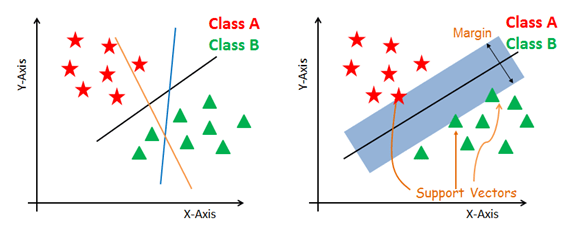

# Dealing with non-linear and inseparable planes

Beberapa masalah tidak dapat diselesaikan menggunakan linear hyperplane, seperti yang ditunjukkan pada gambar di bawah ini (sisi kiri).

Dalam situasi seperti itu, SVM menggunakan kernel untuk mengubah input space ke ruang dimensi yang lebih tinggi seperti yang ditunjukkan di sebelah kanan. Titik data diplot pada sumbu x dan sumbu z (Z adalah jumlah kuadrat dari x dan y: z=x^2=y^2). Sekarang kita dapat dengan mudah memisahkan titik-titik ini menggunakan pemisahan linier.

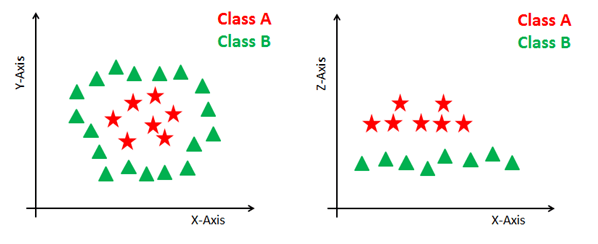

# SVM Kernels

Algoritma SVM diimplementasikan dalam praktiknya menggunakan kernel. Kernel mengubah input data space menjadi bentuk yang diperlukan. SVM menggunakan teknik yang disebut kernel. Di sini, kernel mengambil low-dimensional input space dan mengubahnya menjadi ruang berdimensi lebih tinggi. Dengan kata lain, kita dapat mengatakan bahwa SVM mengubah nonseparable problem menjadi separable problems dengan menambahkan lebih banyak dimensi padanya. SVM paling berguna dalam masalah pemisahan non-linier. Kernel membantu kita membuat pengklasifikasi yang lebih akurat.

- Linear Kernel linear kernel dapat digunakan sebagai dot product pada dua pengamatan yang diberikan. Hasil perkalian antara dua vektor adalah hasil perkalian setiap pasang nilai masukan.

K(x, xi) = sum(x * xi)

- Polynomial Kernel Kernel polinomial adalah bentuk kernel linier yang lebih umum. Kernel polinomial dapat membedakan ruang masukan lengkung atau nonlinier.

K(x,xi) = 1 + sum(x * xi)^d

Dimana d adalah derajat polinomial. d = 1 mirip dengan linear transformation. Degree perlu ditentukan secara manual dalam learning algorithm.

- Radial Basis Function Kernel Radial basis function kernel adalah fungsi kernel populer yang biasa digunakan dalam support vector machine classification. RBF dapat memetakan ruang masukan dalam ruang dimensi tak terhingga.

K(x,xi) = exp(-gamma * sum((x – xi^2))

Di sini gamma adalah parameter, yang berkisar dari 0 sampai 1. Nilai gamma yang lebih tinggi akan sangat cocok dengan training dataset, yang menyebabkan over-fitting. Gamma = 0.1 dianggap sebagai nilai default yang baik. Nilai gamma perlu ditentukan secara manual dalam learning algorithm.

# Classifier Building in Scikit-learn

Sampai saat ini, kita telah mempelajari tentang latar belakang teori SVM. Sekarang kita akan belajar tentang implementasinya dengan Python menggunakan scikit-learn.

Dalam membuat model, kita dapat menggunakan cancer dataset, yang merupakan multi-class classification problem yang sangat terkenal. Dataset ini dihitung dari gambar digital dari fine needle aspirate (FNA) dari massa payudara. Mereka menggambarkan karakteristik inti sel yang ada dalam gambar.

Dataset terdiri dari 30 fitur (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) dan target (jenis kanker).

Data ini memiliki dua jenis kelas kanker: malignant (berbahaya) dan benign(tidak berbahaya). Di sini, kita  dapat membuat model untuk mengelompokkan jenis kanker. Dataset tersedia di pustaka scikit-learn atau kita juga dapat mengunduhnya dari UCI Machine Learning Library.

# Loading Data

Mari muat dulu kumpulan data yang diperlukan yang akan kita gunakan.

In [56]:
#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
cancer = datasets.load_breast_cancer()

# Exploring Data

Setelah kita memuat set data, kita  mungkin ingin tahu lebih banyak tentangnya. Kita dapat memeriksa fitur dan nama target.

In [57]:
# print the names of the 13 features
print("Features: ", cancer.feature_names) 

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Mari kita jelajahi lebih banyak lagi. Kita juga dapat memeriksa bentuk kumpulan data menggunakan shape.

In [58]:
# print data(feature)shape
cancer.data.shape

(569, 30)

Mari kita periksa 5 record teratas dari set fitur.

In [59]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Mari kita lihat set target.

In [60]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Splitting Data

Untuk memahami performa model, membagi set data menjadi training set dan test set adalah strategi yang baik.

Pisahkan kumpulan data dengan menggunakan fungsi train_test_split(). Kita harus meneruskan 3 parameter features, target, and test_set size. Selain itu, kita dapat menggunakan random_state untuk memilih record secara acak.

In [62]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) 

# Generating Model

Mari kita membangun support vector machine model. Pertama, impor modul SVM dan buat objek support vector classifier dengan meneruskan argumen kernel sebagai kernel linier dalam fungsi SVC().

Kemudian, training model kita di train set menggunakanfit() dan lakukan prediksi pada set test menggunakan predict().

In [63]:
#Import svm model
from sklearn import svm 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the Model

Mari kita perkirakan seberapa akurat pengklasifikasi atau model dapat memprediksi kanker payudara pasien.

Akurasi dapat dihitung dengan membandingkan nilai set test aktual dan nilai prediksi.

In [64]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


Kita  mendapat tingkat klasifikasi 96.49%, dianggap sebagai akurasi yang sangat baik.

Untuk evaluasi lebih lanjut, kita juga dapat memeriksa precision dan recall model.

In [65]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


Kita mendapat precision 98% dan recall 96%, yang dianggap sebagai nilai yang sangat baik.

# Exercise: Multiple Algorithm on Dataset

In [66]:
import pandas as pd
import numpy as np

In [67]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [68]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
print("Train Data:")
print(train.isnull().sum(), "\n")

Train Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [71]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

C:\Users\rofya\AppData\Local\Temp\ipykernel_15564\3869796577.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(),inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

In [74]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

C:\Users\rofya\AppData\Local\Temp\ipykernel_15564\210972610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=train.drop('Loan_Status',1)


In [75]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [76]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [77]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [106]:
#(a)LOGISTIC REGRESSION

from sklearn import linear_model

model= linear_model.LogisticRegression()

model.fit(X=x_train,y=y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
pred_cv=model.predict(x_cv)

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.7479674796747967
[[17 24]
 [ 7 75]]


In [82]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
pred_cv1=dt.predict(x_cv)

In [84]:
print(accuracy_score(y_cv,pred_cv1))
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

0.7479674796747967
[[21 20]
 [11 71]]


In [85]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
pred_cv2=rf.predict(x_cv)

In [87]:
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.7967479674796748
[[18 23]
 [ 2 80]]


In [88]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [89]:
pred_cv3=svm_model.predict(x_cv)

In [90]:
print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.6666666666666666
[[ 0 41]
 [ 0 82]]


In [91]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

pred_cv4=nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.7723577235772358
[[20 21]
 [ 7 75]]


In [107]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv5 = kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [95]:
print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4))
print("KNN:", accuracy_score(y_cv,pred_cv5))

Logistic Regression: 0.7479674796747967
Decision Tree: 0.7479674796747967
Random Forest: 0.7967479674796748
SVM: 0.6666666666666666
Naive Bayes: 0.7723577235772358


NameError: name 'pred_cv5' is not defined

In [97]:
#Write test results in csv file

predictions=pd.DataFrame(pred_cv2, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')